In [1]:
%%capture

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#https://www.kaggle.com/code/taniaj/cryptocurrency-price-forecasting/notebook
#https://www.kaggle.com/code/residentmario/time-series-plotting-optional/notebook
#https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series/notebook

**Not completed yet**

In [3]:
pd.read_parquet('/kaggle/input/binance-full-history/BNB-USDT.parquet').to_csv('BNB-USDT.csv')

In [4]:
df = pd.read_csv('/kaggle/working/BNB-USDT.csv')
df

,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2017-11-06 03:54:00,1.5,1.50,1.5,1.50,10.830,16.245,2,10.830,16.245
1,2017-11-06 03:55:00,1.3,1.30,1.3,1.30,1.000,1.300,1,0.000,0.000
2,2017-11-06 03:56:00,1.3,1.30,0.5,0.50,19.000,24.356,6,0.330,0.429
3,2017-11-06 03:57:00,0.5,0.61,0.5,0.61,253.000,151.660,17,0.000,0.000
4,2017-11-06 03:58:00,1.1,1.10,1.1,1.10,85.000,93.500,1,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
2636963,2022-11-16 23:55:00,272.3,272.40,272.1,272.10,196.230,53420.645,137,111.525,30360.486
2636964,2022-11-16 23:56:00,272.2,272.30,272.0,272.30,97.425,26514.332,95,60.926,16582.678
2636965,2022-11-16 23:57:00,272.3,272.40,272.0,272.20,175.073,47646.598,129,76.872,20922.725
2636966,2022-11-16 23:58:00,272.1,272.30,272.1,272.10,40.679,11072.205,65,9.861,2684.308


# Data Understanding
* open_time: This represents the timestamp indicating when the trading period (candle) began.
* open: This is the price at which the trading period (candle) opened.
* high: This represents the highest price reached during the trading period.
* low: This represents the lowest price reached during the trading period.
* close: This is the price at which the trading period (candle) closed.
* volume: This denotes the total amount of the asset traded during the trading period.
* quote_asset_volume: This represents the total value of the asset traded during the trading period in terms of the quote asset (often USD or BTC).
* number_of_trades: This indicates the total number of trades executed during the trading period.
* taker_buy_base_asset_volume: This represents the volume of the asset bought by takers (market buyers) during the trading period.
* taker_buy_quote_asset_volume: This represents the total value of the asset bought by takers (market buyers) during the trading period in terms of the quote asset.

### 1.1 Univariant analysis

**Note:** this is actually featuer engieering part but i need this for ploting so i have created this at the top.

In [5]:
df['return'] = df['close'] - df['open']#close is the closing price and open is the opening price of the coin so if the difference is negtive means we are in loos otherwise profit.
df

,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,return
0,2017-11-06 03:54:00,1.5,1.50,1.5,1.50,10.830,16.245,2,10.830,16.245,0.00
1,2017-11-06 03:55:00,1.3,1.30,1.3,1.30,1.000,1.300,1,0.000,0.000,0.00
2,2017-11-06 03:56:00,1.3,1.30,0.5,0.50,19.000,24.356,6,0.330,0.429,-0.80
3,2017-11-06 03:57:00,0.5,0.61,0.5,0.61,253.000,151.660,17,0.000,0.000,0.11
4,2017-11-06 03:58:00,1.1,1.10,1.1,1.10,85.000,93.500,1,0.000,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2636963,2022-11-16 23:55:00,272.3,272.40,272.1,272.10,196.230,53420.645,137,111.525,30360.486,-0.20
2636964,2022-11-16 23:56:00,272.2,272.30,272.0,272.30,97.425,26514.332,95,60.926,16582.678,0.10
2636965,2022-11-16 23:57:00,272.3,272.40,272.0,272.20,175.073,47646.598,129,76.872,20922.725,-0.10
2636966,2022-11-16 23:58:00,272.1,272.30,272.1,272.10,40.679,11072.205,65,9.861,2684.308,0.00


In [6]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,return
count,2.636968e+06,2.636968e+06,2.636968e+06,2.636968e+06,2.636968e+06,2.636968e+06,2.636968e+06,2.636968e+06,2.636968e+06,2.636968e+06
mean,1.437121e+02,1.438329e+02,1.435834e+02,1.437116e+02,1.501503e+03,1.723165e+05,2.287322e+02,7.670950e+02,8.703254e+04,-4.578384e-04
std,1.840907e+02,1.842423e+02,1.839300e+02,1.840899e+02,2.587709e+03,5.087692e+05,4.793400e+02,1.429921e+03,2.616131e+05,3.340638e-01
min,5.000000e-01,6.100000e-01,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.751610e+01
25%,1.391200e+01,1.392600e+01,1.390000e+01,1.391317e+01,2.701100e+02,8.639812e+03,2.300000e+01,1.061620e+02,3.496213e+03,-1.680000e-02
50%,2.364045e+01,2.366200e+01,2.361560e+01,2.364090e+01,7.185700e+02,3.211200e+04,7.600000e+01,3.276350e+02,1.550417e+04,0.000000e+00
75%,2.932000e+02,2.934100e+02,2.929000e+02,2.932000e+02,1.722509e+03,1.264025e+05,2.390000e+02,8.635036e+02,6.374749e+04,1.760000e-02
max,6.910500e+02,6.917700e+02,6.895800e+02,6.910600e+02,1.809143e+05,5.508505e+07,6.355900e+04,1.044994e+05,3.367680e+07,3.038000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636968 entries, 0 to 2636967
Data columns (total 11 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   open_time                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
 10  return                        float64
dtypes: float64(9), int64(1), object(1)
memory usage: 221.3+ MB


In [8]:
df.isna().sum()

open_time                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
return                          0
dtype: int64

In [9]:
df.columns[1:]


Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'return'],
      dtype='object')

Luckly we have no missing values A rere case! and also all the features are in int form so no transformation required that's great.

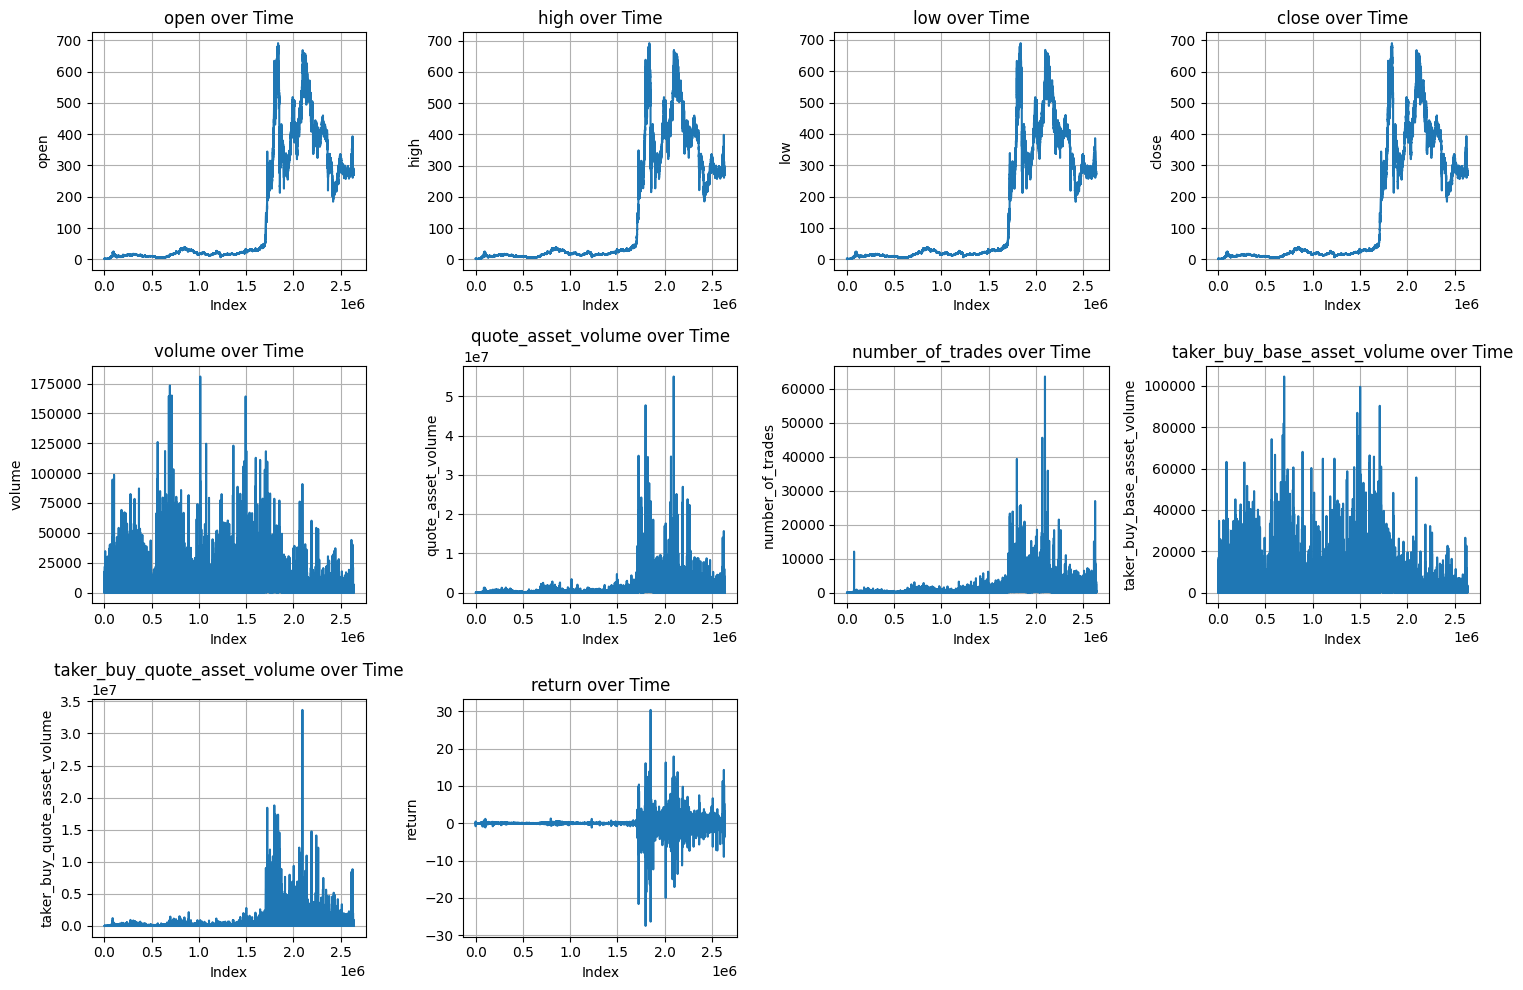

In [10]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the subplot matrix
num_rows = 3
num_cols = 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axs = axs.flatten()
for i, feature in enumerate(df.columns[1:]):  # Start from index 1 to skip 'open_time'
    axs[i].plot(df[feature])
    axs[i].set_title(f'{feature} over Time')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(feature)
    axs[i].grid(True)

for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()

# Show the plots
plt.show()


Lag_plot

A lag plot compares data points from each observation in the dataset against data points from a previous observation. So for example, data from December 21st will be compared with data from December 20th, which will in turn be compared with data from December 19th, and so on. For example, here is what we see when we apply a lag plot to the volume (number of trades conducted) in the stock data:

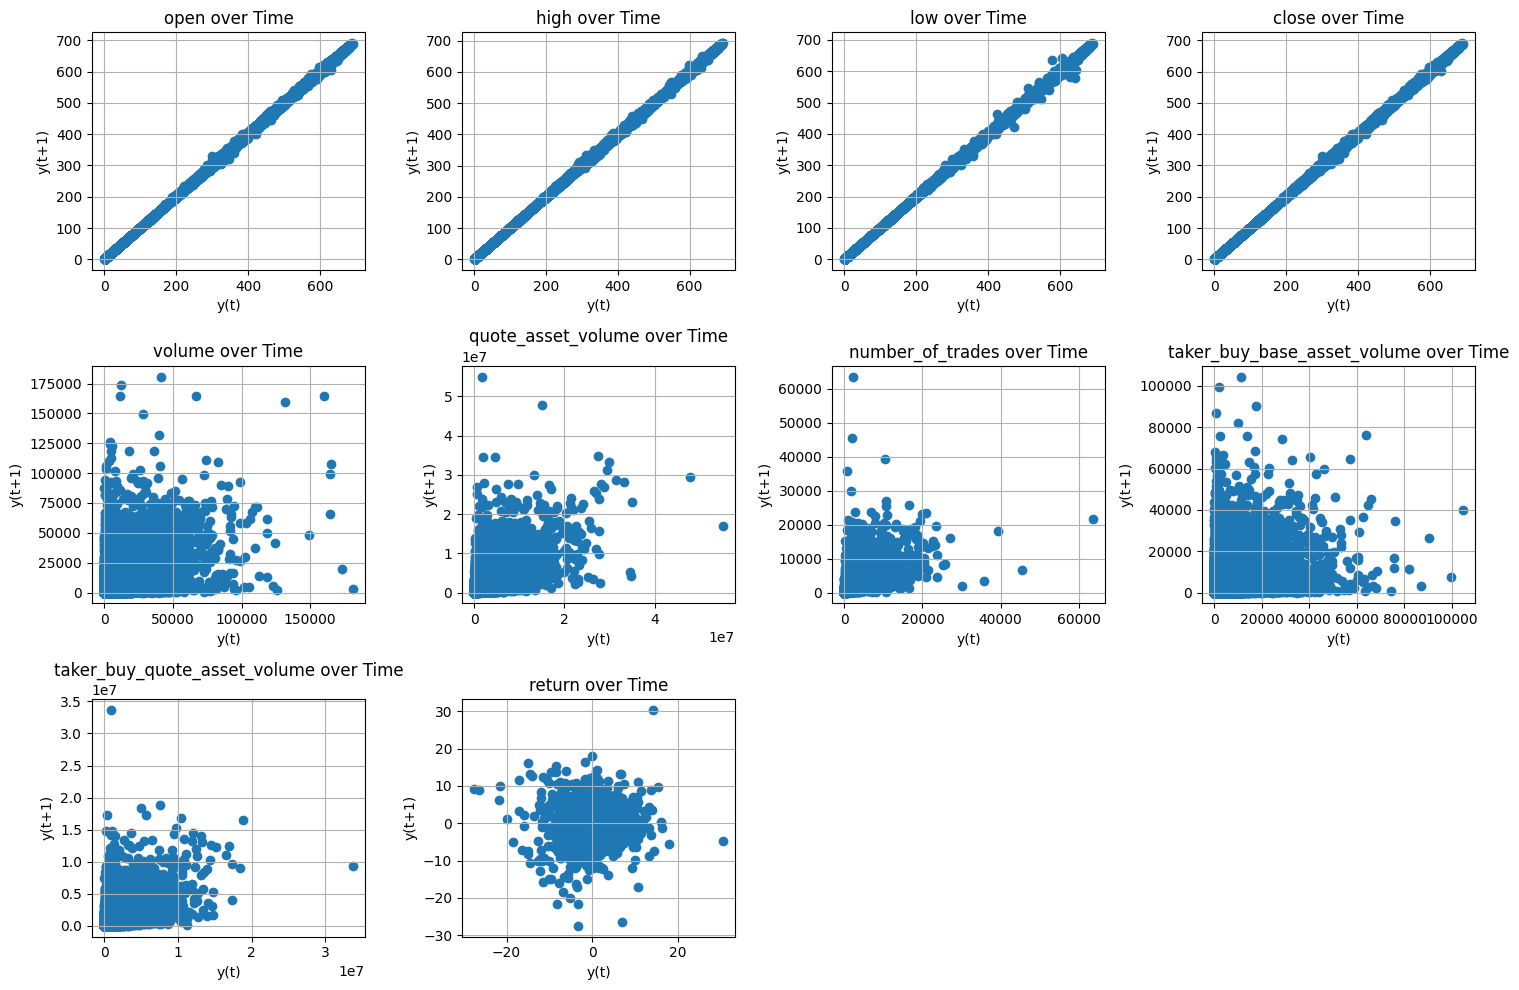

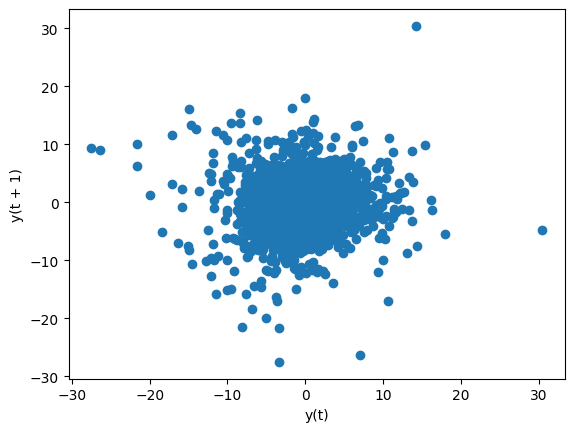

In [11]:
from pandas.plotting import lag_plot
num_rows = 3
num_cols = 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axs = axs.flatten()
for i, feature in enumerate(df.columns[1:]):  # Start from index 1 to skip 'open_time'
    lag_plot(df[feature], ax=axs[i])
    axs[i].set_title(f'{feature} over Time')
    axs[i].set_xlabel('y(t)')
    axs[i].set_ylabel('y(t+1)')
    axs[i].grid(True)

for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()

# Show the plots
plt.show()


lag_plot(df['return'])
plt.show()

The linear realtion represent the exponential growth or decay so they are the important features.

Time-series data tends to exhibit a behavior called periodicity: rises and peaks in the data that are correlated with time. For example, a gym would likely see an increase in attendance at the end of every workday, hence exhibiting a periodicity of a day. A bar would likely see a bump in sales on Friday, exhibiting periodicity over the course of a week. And so on.

Lag plots are extremely useful because they are a simple way of checking datasets for this kind of periodicity.

### 1.2 Bivariant analysis

<Axes: >

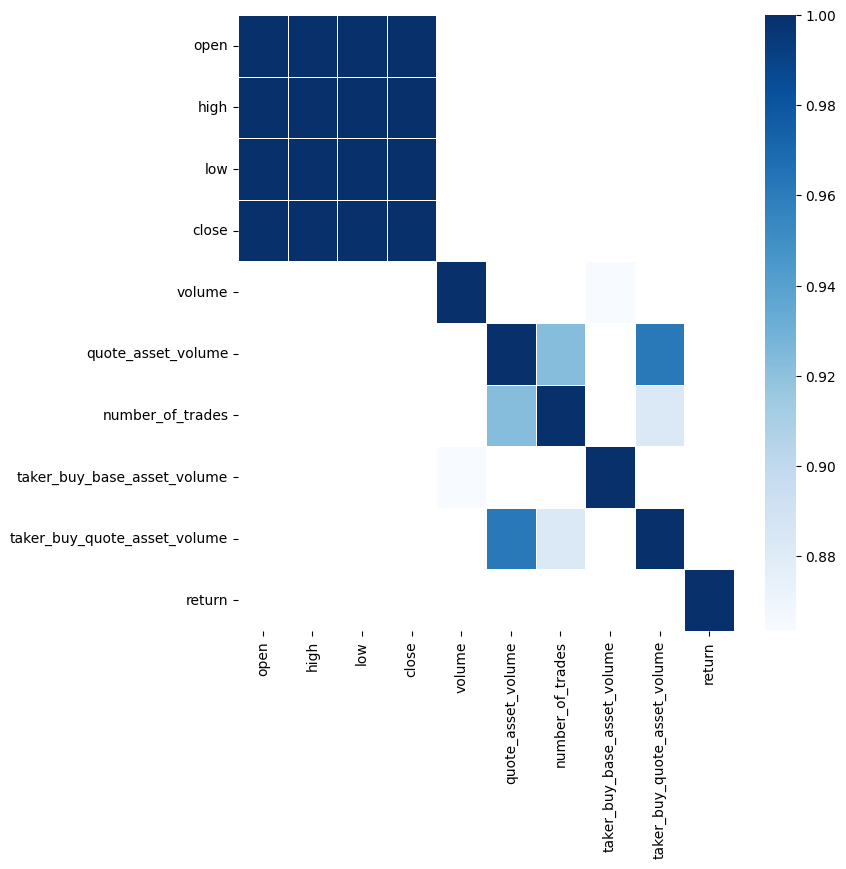

In [12]:
import seaborn as sns
plt.figure(figsize=(8,8))
correlation = df.iloc[:,1:].corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

In [11]:

correlation = df.iloc[:,1:].corr().abs() #this will remove the negtive correlation so please consider those or just remove the abs from this line
correlation[['return']].sort_values(['return'], ascending=False)

,return
return,1.000000
taker_buy_quote_asset_volume,0.086510
taker_buy_base_asset_volume,0.051810
number_of_trades,0.036546
quote_asset_volume,0.027070
volume,0.014014
open,0.003042
high,0.002095
low,0.002025
close,0.001228


**Autocorrelation plot**
A plot type that takes this concept and goes even further with it is the autocorrelation plot. The autocorrelation plot is a multivariate summarization-type plot that lets you check every periodicity at the same time. It does this by computing a summary statistic—the correlation score—across every possible lag in the dataset. This is known as autocorrelation.


In an autocorrelation plot the lag is on the x-axis and the autocorrelation score is on the y-axis. The farther away the autocorrelation is from 0, the greater the influence that records that far away from each other exert on one another.


Here is what an autocorrelation plot looks like when applied to the stock volume data: Lag is the time-difference for each observation in the dataset. Autocorrelation is correlation applied to lag.

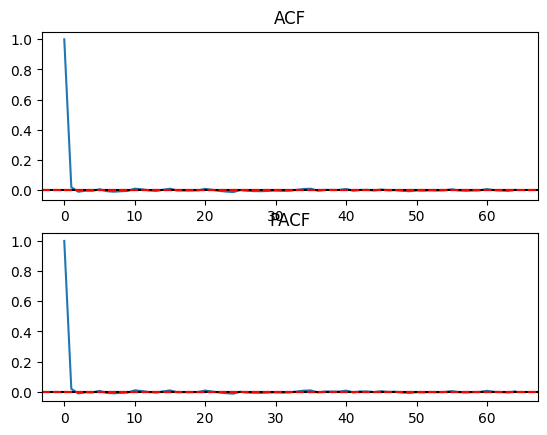

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import numpy as np


# Plot the ACF and PACF
plt.subplot(211)
plt.plot(acf(df['return']))
plt.axhline(0, color='black')
plt.axhline(1.96/np.sqrt(len(df)), color='red', linestyle='dashed')
plt.axhline(-1.96/np.sqrt(len(df)), color='red', linestyle='dashed')
plt.title('ACF')

plt.subplot(212)
plt.plot(pacf(df['return']))
plt.axhline(0, color='black')
plt.axhline(1.96/np.sqrt(len(df)), color='red', linestyle='dashed')
plt.axhline(-1.96/np.sqrt(len(df)), color='red', linestyle='dashed')
plt.title('PACF')

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['return'],lags=5);

In [ ]:
plot_pacf(df['return'],lags=5,title='daily return'); #pacf work will with stationary data

# 2 Feature engineering

**NOTE** our objective is to create a trading chatbot. it means we need to target feature which tells us about the profit or loss.

In [ ]:
#https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/

In [ ]:
#df['return'] = df['close'] - df['open']#close is the closing price and open is the opening price of the coin so if the difference is negtive means we are in loos otherwise profit.
#df

# 3. modeling

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

In [18]:
y = df['return']
X = df.iloc[:,:10]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)